<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data preprocessing</a></span></li><li><span><a href="#Defining-model" data-toc-modified-id="Defining-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Defining model</a></span><ul class="toc-item"><li><span><a href="#Creating-a-basic-model" data-toc-modified-id="Creating-a-basic-model-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Creating a basic model</a></span></li></ul></li><li><span><a href="#Compiling-model" data-toc-modified-id="Compiling-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Compiling model</a></span></li><li><span><a href="#Model-fitting" data-toc-modified-id="Model-fitting-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model fitting</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model Evaluation</a></span></li><li><span><a href="#Model-testing" data-toc-modified-id="Model-testing-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model testing</a></span></li><li><span><a href="#Saving-the-model" data-toc-modified-id="Saving-the-model-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Saving the model</a></span></li></ul></div>

# Imports

In [13]:
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Data preprocessing

In [2]:
data_path = 'dataset/sudoku.csv'
df = pd.read_csv(data_path, skiprows=1)
print(df.shape)

(999999, 2)


In [3]:
example = df.values[0]
#print(example[0])
print("Quiz:")
for i in range(9):
    output = str(example[0][9*i : 9*(i+1)])
    # replacing 0 with x to represent nicely
    print(output.replace('0', 'x').replace('', ' '))

print("Solution:")
for i in range(9):
    output = str(example[1][9*i : 9*(i+1)])
    print(output.replace('0', 'x').replace('', ' '))

Quiz:
 x 4 x 1 x x x 5 x 
 1 x 7 x x 3 9 6 x 
 5 2 x x x 8 x x x 
 x x x x x x x 1 7 
 x x x 9 x 6 8 x x 
 8 x 3 x 5 x 6 2 x 
 x 9 x x 6 x 5 4 3 
 6 x x x 8 x 7 x x 
 2 5 x x 9 7 1 x x 
Solution:
 3 4 6 1 7 9 2 5 8 
 1 8 7 5 2 3 9 6 4 
 5 2 9 6 4 8 3 7 1 
 9 6 5 8 3 2 4 1 7 
 4 7 2 9 1 6 8 3 5 
 8 1 3 7 5 4 6 2 9 
 7 9 8 2 6 1 5 4 3 
 6 3 1 4 8 5 7 9 2 
 2 5 4 3 9 7 1 8 6 


In [4]:
# converting the input into numpy 2d array
no_examples = df.shape[0]

def transform_data_into_array(series):
    str_series = str(series)
    np_arr = np.array([int(x) for x in list(str_series)])
    return np_arr.reshape((81,))

X = np.zeros((no_examples, 81,))
Y = np.zeros((no_examples, 81,))
#X_modified = []
#Y_modified = []
for i in range(no_examples):
    series = df.values[i]
    X[i] = transform_data_into_array(series[0])
    Y[i] = transform_data_into_array(series[1])
    #X_temp = np.copy(X[i])
    #for pos, x in np.ndenumerate(X_temp):
    #    if x == 0:
    #        X_modified.append(np.copy(X_temp))
    #        X_temp[pos] = Y[i][pos]
    #        Y_modified.append(Y[i][pos])
        
#X_modified = np.array(X_modified)
#Y_modified = np.array(Y_modified)
print(X[0])
print(Y[0])
#print(X_modified[0])
#print(Y_modified[0])

[0. 4. 0. 1. 0. 0. 0. 5. 0. 1. 0. 7. 0. 0. 3. 9. 6. 0. 5. 2. 0. 0. 0. 8.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 7. 0. 0. 0. 9. 0. 6. 8. 0. 0. 8. 0. 3.
 0. 5. 0. 6. 2. 0. 0. 9. 0. 0. 6. 0. 5. 4. 3. 6. 0. 0. 0. 8. 0. 7. 0. 0.
 2. 5. 0. 0. 9. 7. 1. 0. 0.]
[3. 4. 6. 1. 7. 9. 2. 5. 8. 1. 8. 7. 5. 2. 3. 9. 6. 4. 5. 2. 9. 6. 4. 8.
 3. 7. 1. 9. 6. 5. 8. 3. 2. 4. 1. 7. 4. 7. 2. 9. 1. 6. 8. 3. 5. 8. 1. 3.
 7. 5. 4. 6. 2. 9. 7. 9. 8. 2. 6. 1. 5. 4. 3. 6. 3. 1. 4. 8. 5. 7. 9. 2.
 2. 5. 4. 3. 9. 7. 1. 8. 6.]


In [6]:
#print(X_modified[1])
#print(Y_modified[1])

[3. 4. 6. 1. 7. 9. 2. 5. 8. 1. 8. 7. 5. 2. 3. 9. 6. 4. 5. 2. 9. 6. 4. 8.
 3. 7. 1. 9. 6. 5. 8. 3. 2. 4. 1. 7. 4. 7. 2. 9. 1. 6. 8. 3. 5. 8. 1. 3.
 7. 5. 4. 6. 2. 9. 7. 9. 8. 2. 6. 1. 5. 4. 3. 6. 3. 1. 4. 8. 5. 7. 9. 2.
 2. 5. 4. 3. 9. 7. 1. 8. 6.]
3.0


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(699999, 81)
(699999, 81)
(300000, 81)
(300000, 81)


# Defining model

## Creating a basic model

Model has 3 hidden layers of 100 nodes each. Input has 81(9x9) nodes input and output is also of 81 nodes.

In [6]:
model = Sequential()
model.add(Dense(729, activation = 'relu', kernel_initializer = 'he_normal', input_shape=(81,)))
model.add(Dense(729, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(729, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(81))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 729)               59778     
_________________________________________________________________
dense_1 (Dense)              (None, 729)               532170    
_________________________________________________________________
dense_2 (Dense)              (None, 729)               532170    
_________________________________________________________________
dense_3 (Dense)              (None, 81)                59130     
Total params: 1,183,248
Trainable params: 1,183,248
Non-trainable params: 0
_________________________________________________________________


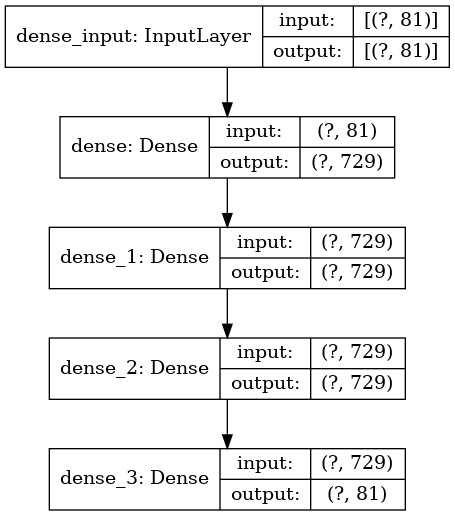

In [8]:
plot_model(model, 'model1.png', show_shapes=True)

# Compiling model

In [9]:
model.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics = ['accuracy'])

# Model fitting

In [10]:
es = EarlyStopping(monitor = 'val_loss', patience = 5)

In [11]:
history = model.fit(X, Y, epochs = 100, batch_size = 32, verbose = 0, validation_split = 0.2, callbacks=[es])

# Model Evaluation

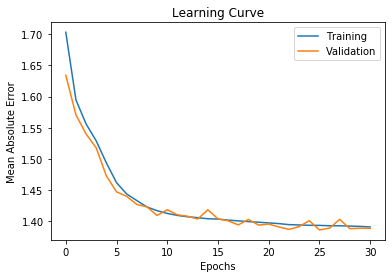

{'loss': [1.703291315068029, 1.5948282934651348, 1.5562290837724122, 1.5290350976486582, 1.4936654605056392, 1.4620833214446673, 1.4438729084200905, 1.4333468168030046, 1.4230688231096438, 1.4170840359339834, 1.4127426847822349, 1.4095224689095407, 1.4073478333032567, 1.4059092916521327, 1.4041670027469921, 1.4036583465231411, 1.4019767801543526, 1.4007635166117611, 1.3995987464273336, 1.3985858260020985, 1.3975034617746949, 1.3964005939905635, 1.3947337464764213, 1.394217740931674, 1.3936822053783682, 1.3935351338241952, 1.3929424806121642, 1.3929142076245347, 1.3923715915783452, 1.3919475301061848, 1.3910323343086195], 'accuracy': [0.10097262, 0.108277634, 0.10788763, 0.107438885, 0.106320135, 0.105161384, 0.104552634, 0.10514263, 0.10503513, 0.10477388, 0.104887635, 0.10569138, 0.105578884, 0.10479888, 0.10470013, 0.10477638, 0.10520263, 0.10497263, 0.10535013, 0.105556384, 0.105793886, 0.10529138, 0.10565513, 0.10503888, 0.10482513, 0.10488388, 0.10467263, 0.104733884, 0.10382388, 

In [21]:
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.plot(history.history['loss'], label = 'Training')
plt.plot(history.history['val_loss'], label = 'Validation')
plt.legend()
plt.show()
print(history.history)

In [23]:
loss, acc = model.evaluate(X_test, y_test, batch_size=32, verbose=0)
print(acc)

0.14104


# Model testing

In [27]:
print(X[0].shape)
y_pred = model.predict([[X[0]]])
print(Y[0])
print(y_pred)

(81,)
[3. 4. 6. 1. 7. 9. 2. 5. 8. 1. 8. 7. 5. 2. 3. 9. 6. 4. 5. 2. 9. 6. 4. 8.
 3. 7. 1. 9. 6. 5. 8. 3. 2. 4. 1. 7. 4. 7. 2. 9. 1. 6. 8. 3. 5. 8. 1. 3.
 7. 5. 4. 6. 2. 9. 7. 9. 8. 2. 6. 1. 5. 4. 3. 6. 3. 1. 4. 8. 5. 7. 9. 2.
 2. 5. 4. 3. 9. 7. 1. 8. 6.]
[[4.2130013 4.768916  6.7358804 4.709598  4.9927225 5.058983  3.7596924
  4.44586   5.6553974 2.2410316 3.509304  6.705989  5.1627426 3.8429193
  3.9949982 9.050652  5.9338346 3.154108  6.357727  2.6576405 7.2638917
  4.7610745 3.9032283 7.7932744 1.8628064 5.8841367 3.4181876 6.46271
  5.884486  4.4103017 6.8572917 4.7866955 3.608449  2.5450757 0.8801786
  8.248243  4.8244867 3.8548036 2.8854568 8.608098  1.2773533 5.8126817
  7.8444285 4.5007763 3.6718454 7.7715917 4.058273  2.1419635 4.872493
  4.8567924 3.6910481 6.3829165 5.5418777 5.648973  4.25062   8.852468
  6.7132764 2.1439729 5.40773   3.6286652 4.954679  4.9023046 3.3738325
  5.946262  3.1554534 3.035328  3.654278  7.735261  2.931263  6.7061553
  6.4703455 4.776038  2.635329

# Saving the model

In [12]:
model.save('multi_task_classification.h5')